## Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_flights = pd.read_csv("DelayedFlights.csv")
df_flights = df_flights.sample(500, random_state = 0) # Sample muy pequeña para poder ejecutar sin que consuma mucho tiempo

# Utilizar solo datos numérficos
flights_int = df_flights.loc[:,(df_flights.dtypes=='int').values]
flights_float = df_flights.loc[:,(df_flights.dtypes=='float').values]
df_flights = pd.concat([flights_int, flights_float], axis=1)

count_nan_in_df = df_flights.isnull().sum()
print(count_nan_in_df)

Unnamed: 0             0
Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
CRSDepTime             0
CRSArrTime             0
FlightNum              0
Distance               0
Cancelled              0
Diverted               0
DepTime                0
ArrTime                2
ActualElapsedTime      2
CRSElapsedTime         0
AirTime                2
ArrDelay               2
DepDelay               0
TaxiIn                 2
TaxiOut                0
CarrierDelay         196
WeatherDelay         196
NASDelay             196
SecurityDelay        196
LateAircraftDelay    196
dtype: int64


In [214]:
# Eliminar filas con valores nulos que no pueden sustituirse por 0
df_flights = df_flights.dropna(subset=['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut'])
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Unnamed: 0             0
Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
CRSDepTime             0
CRSArrTime             0
FlightNum              0
Distance               0
Cancelled              0
Diverted               0
DepTime                0
ArrTime                0
ActualElapsedTime      0
CRSElapsedTime         0
AirTime                0
ArrDelay               0
DepDelay               0
TaxiIn                 0
TaxiOut                0
CarrierDelay         194
WeatherDelay         194
NASDelay             194
SecurityDelay        194
LateAircraftDelay    194
dtype: int64


In [215]:
# Para valores en los que nulo, equivale a 0, sustituir valores nulos por cero
df_flights = df_flights.fillna(0)
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
FlightNum            0
Distance             0
Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [216]:
# Separar dataset en features y labels
y = df_flights.ArrDelay
X = df_flights.drop('ArrDelay', axis=1)

**Linear Regression**

In [217]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

**Decision tree**

In [218]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state = 0)

**Random Forests**

In [219]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

**Neural Network**

In [220]:
from sklearn.neural_network import MLPClassifier

neuralNetwork = MLPClassifier(random_state = 0)

## Exercici 2
Compara’ls en base al MSE i al R2

**R2**

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

linearRegression_model = linearRegression.fit(x_train, y_train)
y_true = y_test
y_pred = linearRegression_model.predict(x_test)
print("Linear Regression:", round(r2_score(y_true, y_pred),2))

Linear Regression: 1.0


In [222]:
decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
print("Decision Tree:", round(r2_score(y_true, y_pred),2))

Decision Tree: 0.88


In [223]:
randomForest_model = randomForest.fit(x_train, y_train)
y_true = y_test
y_pred = randomForest_model.predict(x_test)
print("Random Forest:", round(r2_score(y_true, y_pred),2))

Random Forest: 0.95


In [224]:
neuralNetwork_model = neuralNetwork.fit(x_train, y_train)
y_true = y_test
y_pred = neuralNetwork_model.predict(x_test)
print("Neural Network:", round(r2_score(y_true, y_pred),2))

Neural Network: -0.4


R2 indica el porcentaje de la varianza de la variable dependiente respecto a la media, ArrDelay, que se explica por el modelo lineal. Según R2, Linear Regression es un modelo perfecto capaz de explicar todas las variaciones de ArrDelay. Random Forest y Decision Tree también son modelos con puntuaciones muy altas, capaces de explicar el 93 y el 94 por ciento de la varianza respectivamente. Sin embargo, la puntuación de Neural Network, al ser un valor negativo, indica que es un modelo muy deficiente para predicir la varianza.

**MSE**

In [225]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

linearRegression_model = linearRegression.fit(x_train, y_train)
y_true = y_test
y_pred = linearRegression_model.predict(x_test)
print("Linear Regression:", round(mean_squared_error(y_true, y_pred),2))

decisionTree_model = decisionTree.fit(x_train, y_train)
y_true = y_test
y_pred = decisionTree_model.predict(x_test)
print("Decision Tree:", round(mean_squared_error(y_true, y_pred),2))

randomForest_model = randomForest.fit(x_train, y_train)
y_true = y_test
y_pred = randomForest.predict(x_test)
print("Random Forest:", round(mean_squared_error(y_true, y_pred),2))

neuralNetwork_model = neuralNetwork.fit(x_train, y_train)
y_true = y_test
y_pred = neuralNetwork_model.predict(x_test)
print("Neural Network:", round(mean_squared_error(y_true, y_pred),2))

Linear Regression: 0.0
Decision Tree: 214.14
Random Forest: 93.18
Neural Network: 2542.01


El MSE mide la cantidad de error acumulado en los modelos. Evalúa la diferencia cuadrática promedio entre los valores observados y predichos. Cuando un modelo no tiene error, el MSE es igual a cero. A medida que aumenta el error del modelo, aumenta su valor.
Por tanto, según el MSE en este caso Linear Regression es un modelo perfecto. Por otro lado, los otros modelos presentan un error bastante mayor, donde destaca Neural Network, con un valor descomunal.

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten

In [226]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

linearRegression_model = linearRegression.fit(x_train,y_train)

decisionTree_model = decisionTree.fit(x_train,y_train)

randomForest_model = randomForest.fit(x_train,y_train)

neuralNetwork_model = neuralNetwork.fit(x_train,y_train)

## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

Linear Regression
Train/Test: 1.0
Validacio interna: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of 1.00 accuracy with a Standard Deviation of 0.00


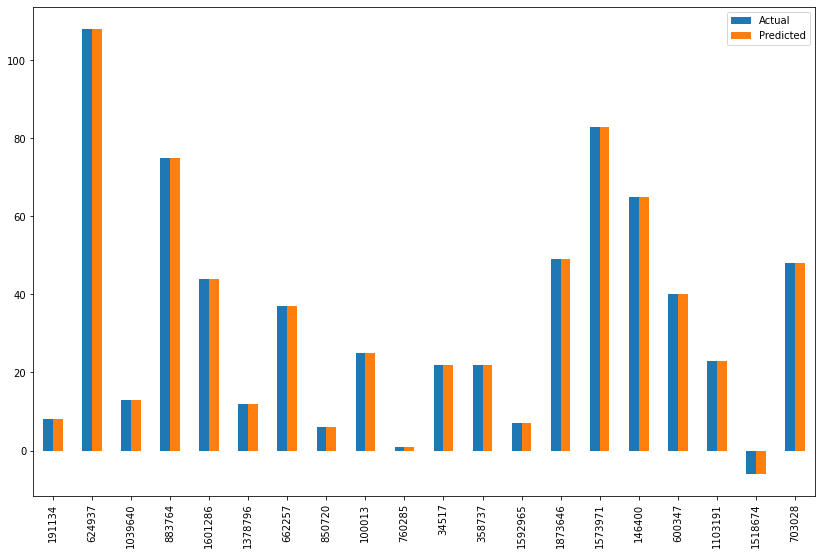

In [227]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("Linear Regression")
score = linearRegression_model.score(x_test, y_test)
print("Train/Test:", score)
score = cross_val_score(linearRegression_model, X, y, cv=10)
print("Validacio interna:", score)
print("Mean of %0.2f accuracy with a Standard Deviation of %0.2f" % (score.mean(), score.std()))

y_pred = linearRegression_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20) # mostrar solo los 20 primeros registros para favorecer su visibilidad
df.plot(kind='bar',figsize=(14,9))
plt.show()



Decision Tree
Train/Test: 0.881929462475249
Validacio interna: [0.94613203 0.88810219 0.92466092 0.89865009 0.91644861 0.78328622
 0.8036546  0.89789256 0.88066712 0.9041894 ]
Mean of 0.88 accuracy with a Standard Deviation of 0.05


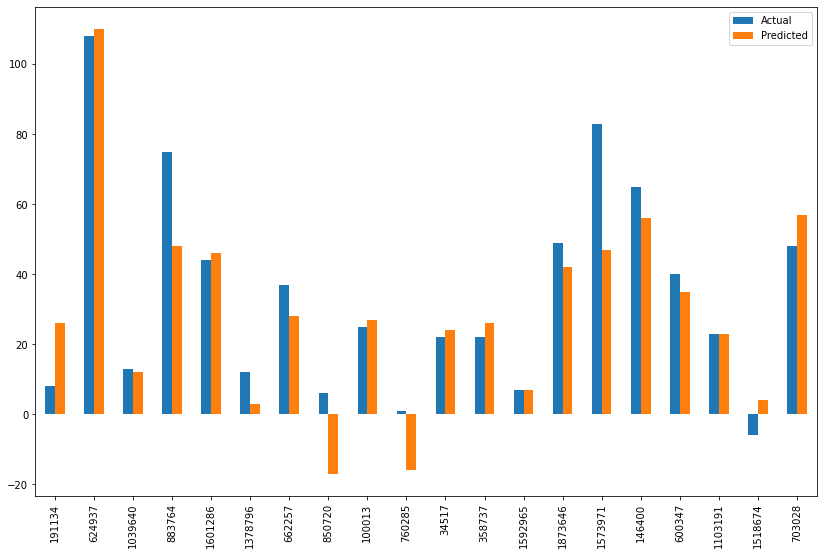

In [228]:
print("\n\nDecision Tree")
score = decisionTree_model.score(x_test, y_test)
print("Train/Test:", score)
score = cross_val_score(decisionTree_model, X, y, cv=10)
print("Validacio interna:", score)
print("Mean of %0.2f accuracy with a Standard Deviation of %0.2f" % (score.mean(), score.std()))

y_pred = decisionTree_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()



Random Forest
Train/Test: 0.9486235678309559
Validacio interna: [0.9670354  0.94585308 0.96846175 0.9212326  0.97356538 0.90913145
 0.90792753 0.93379732 0.95923076 0.97426875]
Mean of 0.95 accuracy with a Standard Deviation of 0.03


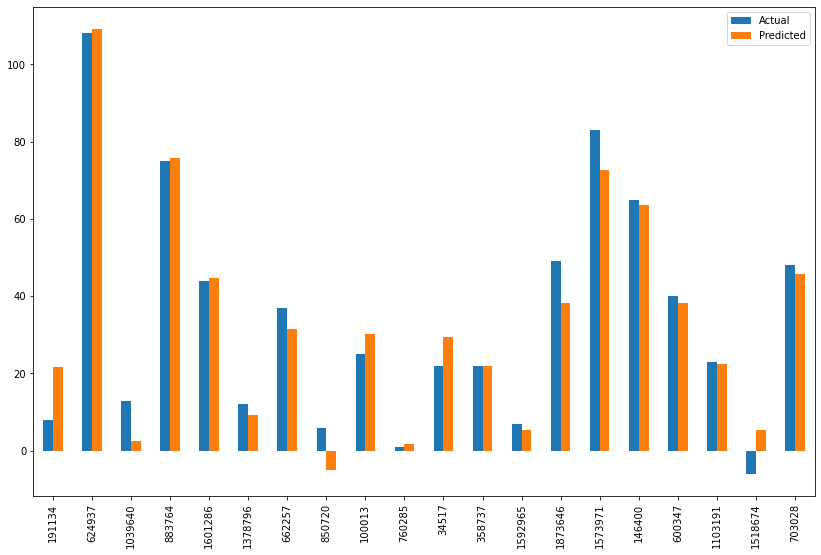

In [229]:
print("\n\nRandom Forest")
score = randomForest_model.score(x_test, y_test)
print("Train/Test:", score)
score = cross_val_score(randomForest_model, X, y, cv=10)
print("Validacio interna:", score)
print("Mean of %0.2f accuracy with a Standard Deviation of %0.2f" % (score.mean(), score.std()))

y_pred = randomForest_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()



Neural Network
Train/Test: 0.01
Validacio interna: [0.00401606 0.        ]
Mean of 0.00 accuracy with a Standard Deviation of 0.00


/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


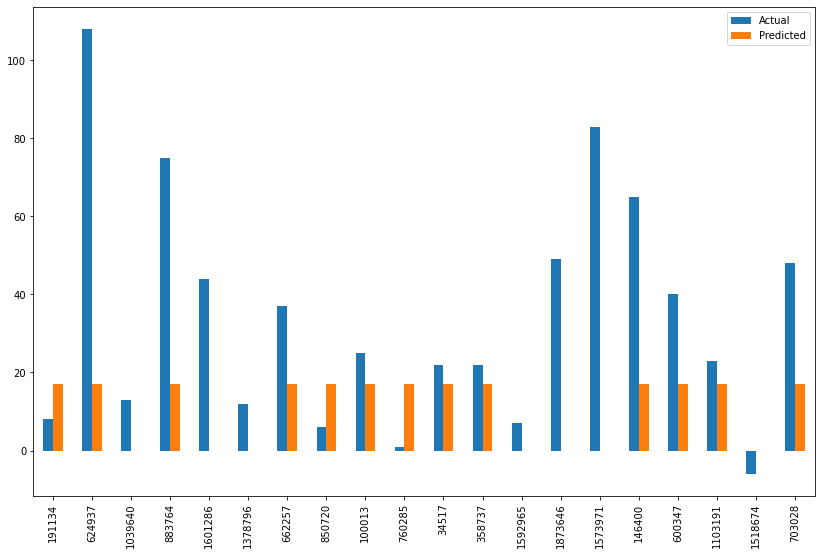

In [230]:
print("\n\nNeural Network")
score = neuralNetwork_model.score(x_test, y_test)
print("Train/Test:", score)
score = cross_val_score(neuralNetwork_model, X, y, cv=2)
print("Validacio interna:", score)
print("Mean of %0.2f accuracy with a Standard Deviation of %0.2f" % (score.mean(), score.std()))

y_pred = neuralNetwork_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

He realizado la evaluación del rendimiento a través del cross validation (10-fold). 

He comparado el resultado de esta evaluación para la aproximación train/test y validación interna (en este caso, para comprender los datos, he calculado la media de las 10 puntuaciones).

Para Linear Regression y Decision Tree los resultados de rendimiento son iguales según los dos enfoques, y para Random Forest y Neural Network varía en 0.01 entre enfoques.

## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Train/Test: 1.0
Validacio interna: 1.0


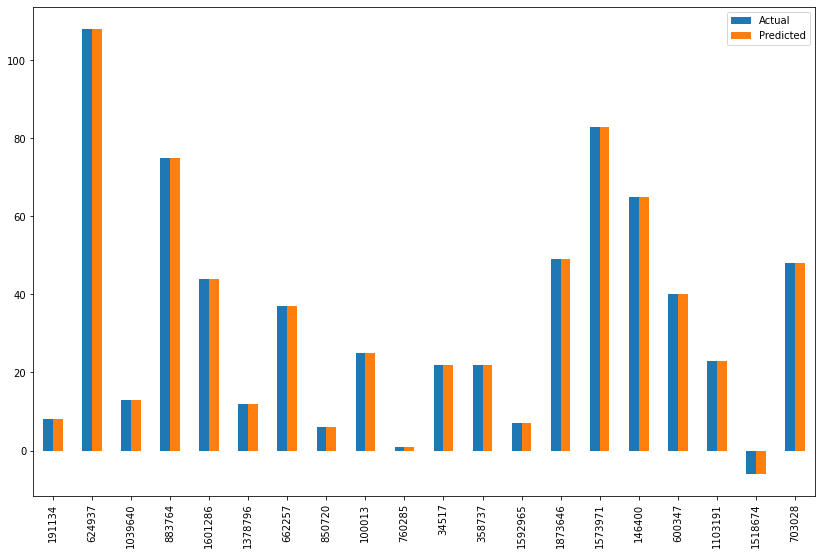

In [231]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

pipe = make_pipeline(RobustScaler(), LinearRegression())
pipe.fit(X_train, y_train)
print("Train/Test:", pipe.score(X_test, y_test))
print("Validacio interna:", np.mean(cross_val_score(linearRegression_model, X, y, cv=10)))
y_pred = pipe.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20) 
df.plot(kind='bar',figsize=(14,9))
plt.show()

Train/Test: 0.8818412431514236
Validacio interna: 0.8843683735042388


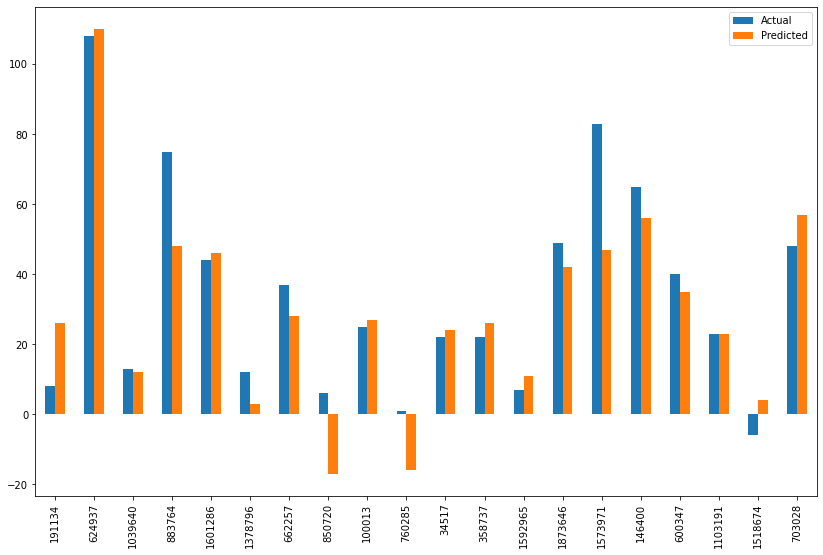

In [232]:
pipe = make_pipeline(RobustScaler(), DecisionTreeRegressor(random_state=0))
pipe.fit(X_train, y_train)
print("Train/Test:", pipe.score(X_test, y_test))
print("Validacio interna:", np.mean(cross_val_score(decisionTree_model, X, y, cv=10)))
y_pred = pipe.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

Train/Test: 0.948958779702895
Validacio interna: 0.9460504028608463


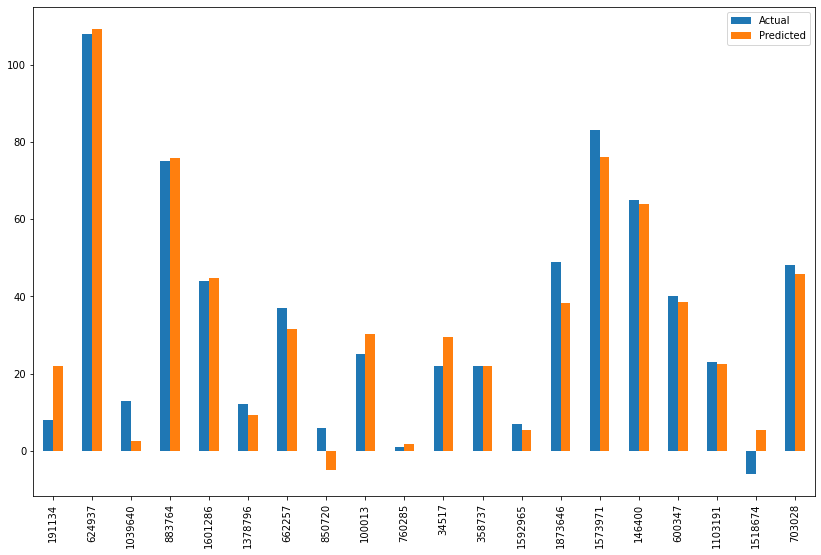

In [233]:
pipe = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators = 1000, random_state = 42))
pipe.fit(X_train, y_train)
print("Train/Test:", pipe.score(X_test, y_test))
print("Validacio interna:", np.mean(cross_val_score(randomForest_model, X, y, cv=10)))
y_pred = pipe.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Train/Test: 0.04
Validacio interna: 0.00804081632653061


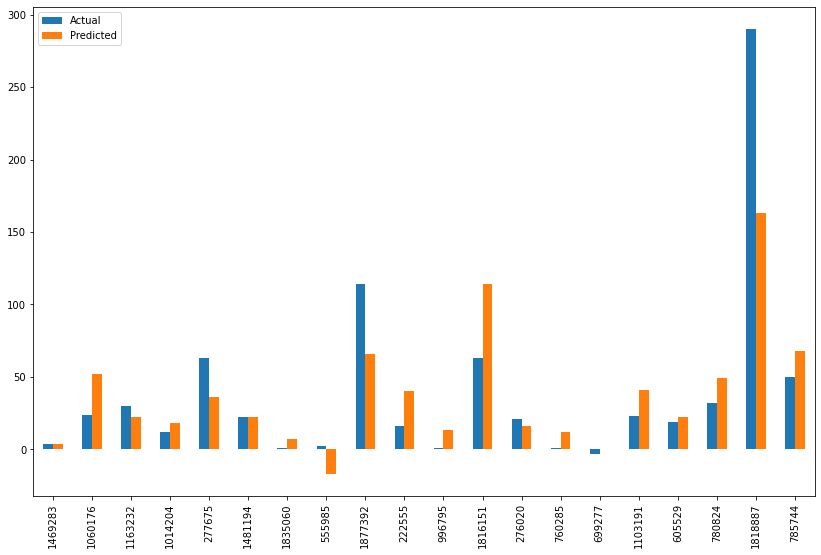

In [240]:
pipe = make_pipeline(RobustScaler(), MLPClassifier(random_state = 0))
pipe.fit(X_train, y_train)
print("Train/Test:", pipe.score(X_test, y_test))
print("Validacio interna:", np.mean(cross_val_score(neuralNetwork_model, X, y, cv=10)))
y_pred = pipe.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

Gracias al proceso de escalado de varibles teniendo en cuenta los outliers, el rendimiento se ha mantenido prácticamente igual para todos los modelos, a excepción de Neural Network, donde se aprecia una muy pequeña mejoría.

## Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [235]:
X.drop(columns=['DepDelay'],inplace=True)
display(X.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'CRSArrTime', 'FlightNum', 'Distance', 'Cancelled', 'Diverted',
       'DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Linear Regression
[  2.80628657  26.62594962  31.71343153   4.96772202  63.77983322
  24.1984709    2.48695162  -0.99114546 115.76426862  17.38682093
   2.39213369  63.70236389  24.00633638   2.1733635    2.34289181
  24.95768381  20.96850398  32.59795497 284.10481607  52.20014058
  46.27508386  78.2407467   68.78515053  74.74733946   1.22166521
  21.56601146  77.02318627  44.65688948  52.49490869  29.07915115
  27.34344742  32.60588889   2.58082972  25.05005493  43.57379926
   4.39531857   1.29938581  69.27192678   2.35262511  18.59453808
   4.33198506 115.11246143   1.43005246   1.30306896  39.28642185
   2.86004599   0.96912052  66.26387391   2.31462774   2.18514289
  48.69944074   2.67699316   2.3702238  147.41327904  -0.70789255
  53.76894356  29.16105715 128.86790944   3.30436526  49.98875381
  19.99288859  54.6018705    3.68193871  95.84717534   0.29076484
   0.89563855   3.10144394  20.79114422 141.22643743  21.87653656
   3.79526714   1.53786291 262.77681333 106.93400971  34.0

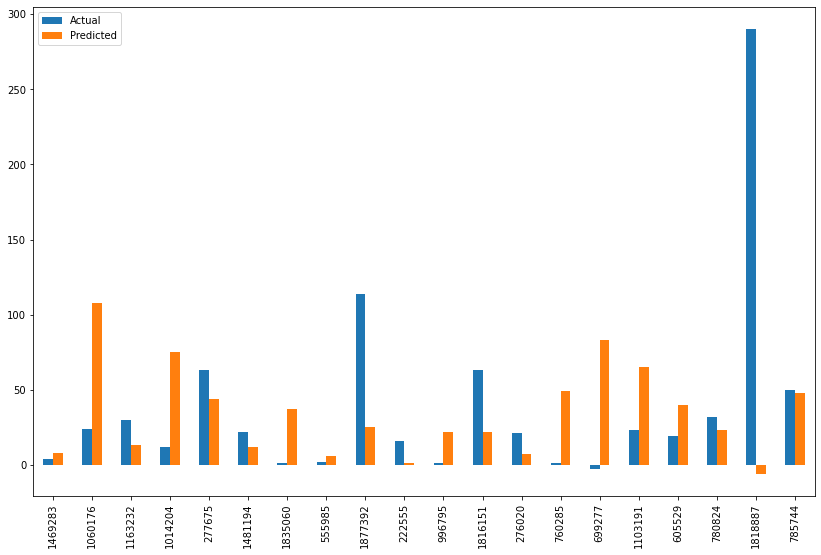

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

pipe = make_pipeline(RobustScaler(), LinearRegression())
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Linear Regression", predictions, sep = "\n")

y_pred = linearRegression_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

Random Forest
[  1.836  22.322  29.956   8.332  57.162  22.035   2.206  -3.302  79.302
  19.605   5.038  63.047  22.122   4.26    2.379  25.279  20.955  29.23
 198.691  53.655  39.967  76.677  70.699  59.647   4.417  22.546  82.399
  48.773  58.073  31.335  23.327  31.324   4.804  25.181  42.159   7.213
   3.004  70.238   1.419  20.575   3.849 117.122   0.848  -0.26   36.482
  -2.531   3.636  67.631   1.231   3.97   38.399   9.605   4.045 188.987
   0.491  60.177  27.93  170.318   0.99   55.104  22.663  62.368   6.753
  85.796  -0.363   6.401   5.263  21.477 189.236  19.616   7.942   3.519
 197.297 149.363  36.817   2.448   3.325   6.388  67.636   3.748  89.882
   2.208   6.824   7.332   3.235  40.943   5.316  25.022  51.83   73.262
  20.507  44.539 125.961  42.992  23.369  33.168  21.871  91.123   5.463
   3.14 ]


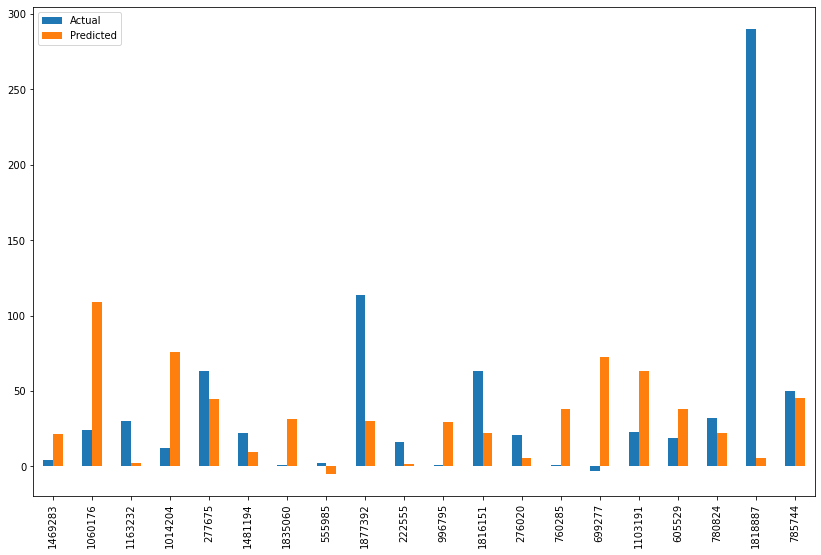

In [237]:
pipe = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators = 1000, random_state = 42))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Random Forest", predictions, sep = "\n")

y_pred = randomForest_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

Decision Tree
[-11.  29.  32.   9.  53.  22.  -3. -17.  78.  16. -16.  37.  28.  -2.
   7.  21.  16.  51. 159.  52.  44.  85.  90.  44.   7.  22.  85.  54.
  44.  35.  17.  36.   7.  21.  41.  10.   6.  79.   9.  17.   7. 113.
   1.   0.  44. -16.  10.  66.   7.  12.  35.   5.   1. 179.   5.  90.
  44. 215.  -7.  42.  16.  63.  12.  85.   1.  14.   9.  17. 237.  15.
  14.  14. 179. 166.  39.  11.  12.   6.  66.   5.  63.   3.  12.   9.
   7.  36.   3.  15.  40.  66.  15.  42. 110.  27.  21.  50.  15. 114.
  12.   6.]


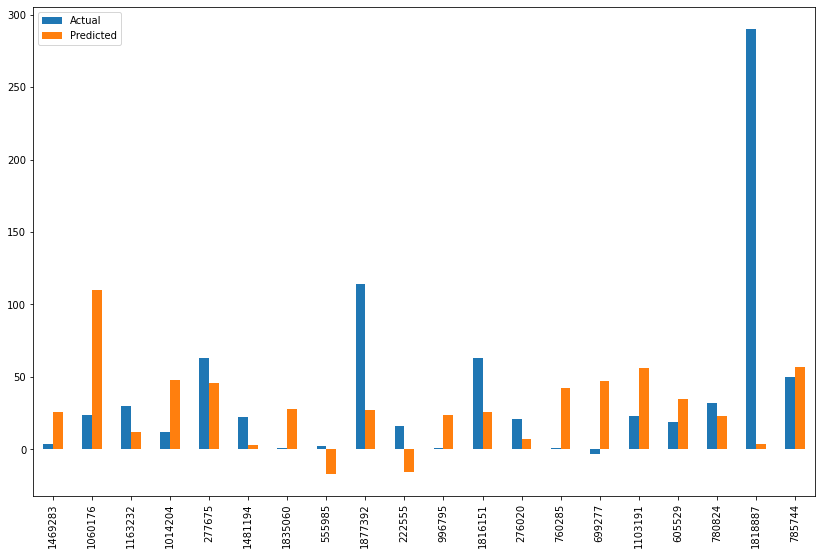

In [238]:
pipe = make_pipeline(RobustScaler(), DecisionTreeRegressor(random_state=0))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Decision Tree", predictions, sep = "\n")

y_pred = decisionTree_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network
[  4.  52.  22.  18.  36.  22.   7. -17.  66.  40.  13. 114.  16.  12.
   0.  41.  22.  49. 163.  68.  28.  80.  90.  24.   9.  21.  24.  26.
  37.  37.  16.  24.   3.  41.  26.  10. -16.  66.   0.  39.   3.  36.
  -7.   2.  44. -16.   6.  36.   7.  12.  41.   3.   7.  83.  -6.  90.
  36.  92.   0.  41.  59.  80. -16. 154.  -1.  14.   3.  15. 179.  15.
  14.   7. 163. 225.  38.   3.  -6.   7.  54.   7.  45.  -2.  13.   3.
  -6.  24.  12.  32.  95.  56.  14.  38.  56.  27.  32.  36.   4.  56.
   1.  14.]


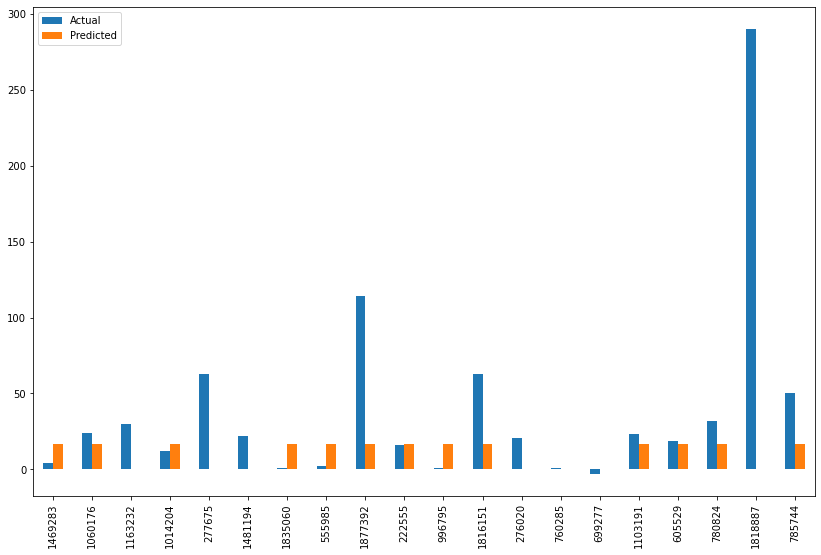

In [239]:
pipe = make_pipeline(RobustScaler(), MLPClassifier(random_state = 0))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Neural Network", predictions, sep = "\n")

y_pred = neuralNetwork_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df = df.head(20)
df.plot(kind='bar',figsize=(14,9))
plt.show()

Como puede comprobarse, la variable DepDelay tenía mucho peso. Prescindir de ella ha hecho que las predicciones se alejen sustancialmente de los resultados reales para todos los modelos.